In [2]:
# Code snippet to inspect your Walmart dataset using pandas

import pandas as pd

# Load your data (replace 'walmart_data.csv' with your actual file path)
df = pd.read_csv('Walmart.csv')

# 1. Check column names
print("Column Names:")
print(df.columns.tolist())

# 2. Check data types and non-null counts
print("\nData Types and Non-Null Counts:")
df.info()




Column Names:
['transaction_id', 'customer_id', 'product_id', 'product_name', 'category', 'quantity_sold', 'unit_price', 'transaction_date', 'store_id', 'store_location', 'inventory_level', 'reorder_point', 'reorder_quantity', 'supplier_id', 'supplier_lead_time', 'customer_age', 'customer_gender', 'customer_income', 'customer_loyalty_level', 'payment_method', 'promotion_applied', 'promotion_type', 'weather_conditions', 'holiday_indicator', 'weekday', 'stockout_indicator', 'forecasted_demand', 'actual_demand']

Data Types and Non-Null Counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   transaction_id          5000 non-null   int64  
 1   customer_id             5000 non-null   int64  
 2   product_id              5000 non-null   int64  
 3   product_name            5000 non-null   object 
 4   category              

In [3]:
# 3. View a sample row
print("\nSample Row:")
print(df.head())


Sample Row:
   transaction_id  customer_id  product_id product_name     category  \
0               1         2824         843       Fridge  Electronics   
1               2         1409         135           TV  Electronics   
2               3         5506         391       Fridge  Electronics   
3               4         5012         710   Smartphone  Electronics   
4               5         4657         116       Laptop  Electronics   

   quantity_sold  unit_price transaction_date  store_id   store_location  ...  \
0              3      188.46  3/31/2024 21:46         3        Miami, FL  ...   
1              4     1912.04  7/28/2024 12:45         5       Dallas, TX  ...   
2              4     1377.75   6/10/2024 4:55         1  Los Angeles, CA  ...   
3              5      182.31   8/15/2024 1:03         5        Miami, FL  ...   
4              3      499.28   9/13/2024 0:45         6      Chicago, IL  ...   

   customer_loyalty_level  payment_method  promotion_applied  \
0  

**DATA CLEANING**

In [4]:
# Convert transaction_date
df['transaction_date'] = pd.to_datetime(df['transaction_date'], format='%m/%d/%Y %H:%M', errors='coerce')

# Report parsing issues
missing_dates = df['transaction_date'].isna().sum()
print(f"Rows with unparsed dates: {missing_dates}")

# Inspect data type
print(df['transaction_date'].dtype)

Rows with unparsed dates: 0
datetime64[ns]


In [5]:
# Count duplicate transaction IDs
dupe_count = df.duplicated(subset=['transaction_id']).sum()
print(f"Duplicate transactions: {dupe_count}")

# (Optional) Preview duplicates
print(df[df.duplicated(subset=['transaction_id'], keep=False)].head())


Duplicate transactions: 0
Empty DataFrame
Columns: [transaction_id, customer_id, product_id, product_name, category, quantity_sold, unit_price, transaction_date, store_id, store_location, inventory_level, reorder_point, reorder_quantity, supplier_id, supplier_lead_time, customer_age, customer_gender, customer_income, customer_loyalty_level, payment_method, promotion_applied, promotion_type, weather_conditions, holiday_indicator, weekday, stockout_indicator, forecasted_demand, actual_demand]
Index: []

[0 rows x 28 columns]


In [6]:
# Missing values per column
print(df.isna().sum().sort_values(ascending=False))

# Data types overview
print(df.dtypes)


promotion_type            3407
transaction_id               0
product_id                   0
customer_id                  0
category                     0
quantity_sold                0
unit_price                   0
transaction_date             0
store_id                     0
store_location               0
inventory_level              0
product_name                 0
reorder_point                0
reorder_quantity             0
supplier_lead_time           0
supplier_id                  0
customer_gender              0
customer_income              0
customer_loyalty_level       0
customer_age                 0
payment_method               0
promotion_applied            0
weather_conditions           0
holiday_indicator            0
weekday                      0
stockout_indicator           0
forecasted_demand            0
actual_demand                0
dtype: int64
transaction_id                     int64
customer_id                        int64
product_id                         in

Impute & Normalize Promotion Type
Since promotion_type is only relevant when promotion_applied == True, we’ll fill missing promotions with "No Promotion".

In [7]:
# Fill missing promotion types
df['promotion_type'] = df['promotion_type'].fillna('No Promotion')

# Sanity check
print(df['promotion_type'].value_counts(dropna=False))


promotion_type
No Promotion           3407
BOGO                    820
Percentage Discount     773
Name: count, dtype: int64


Split & Clean Store Location
Extract city and state from store_location for easier grouping:

In [8]:
# Split into city and state
df[['city', 'state']] = df['store_location'].str.split(',\s*', expand=True)

# Drop the old column
df = df.drop(columns=['store_location'])

# Check unique states
print(df['state'].unique())


['FL' 'TX' 'CA' 'IL' 'NY']


Convert to Appropriate Types,
Mark repeated text columns as categorical to save memory and prepare for modeling:

In [9]:
cats = [
    'product_name','category','customer_gender','customer_loyalty_level',
    'payment_method','promotion_type','weather_conditions','weekday',
    'city','state'
]

for col in cats:
    df[col] = df[col].astype('category')

# Verify dtypes
print(df.dtypes[cats])


product_name              category
category                  category
customer_gender           category
customer_loyalty_level    category
payment_method            category
promotion_type            category
weather_conditions        category
weekday                   category
city                      category
state                     category
dtype: object


In [10]:
df['revenue'] = df['quantity_sold'] * df['unit_price']


In [11]:
print(df.info())
print(df.head(2))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   transaction_id          5000 non-null   int64         
 1   customer_id             5000 non-null   int64         
 2   product_id              5000 non-null   int64         
 3   product_name            5000 non-null   category      
 4   category                5000 non-null   category      
 5   quantity_sold           5000 non-null   int64         
 6   unit_price              5000 non-null   float64       
 7   transaction_date        5000 non-null   datetime64[ns]
 8   store_id                5000 non-null   int64         
 9   inventory_level         5000 non-null   int64         
 10  reorder_point           5000 non-null   int64         
 11  reorder_quantity        5000 non-null   int64         
 12  supplier_id             5000 non-null   int64   

Aggregation at the weekly level. We’ll group by store_id and week-start date, computing our key metrics

In [12]:
# Derive the week start (Monday) for each transaction
df['week_start'] = df['transaction_date'].dt.to_period('W-MON').apply(lambda r: r.start_time)


Aggregate Metrics per Store–Week

In [13]:
agg = df.groupby(['store_id', 'week_start']).agg(
    units_sold        = ('quantity_sold', 'sum'),
    revenue           = ('revenue', 'sum'),
    avg_unit_price    = ('unit_price', 'mean'),
    stockouts         = ('stockout_indicator', 'sum'),
    promotions_count  = ('promotion_applied', 'sum'),
    holiday_weeks     = ('holiday_indicator', 'max'),  # 1 if any holiday week
    forecasted_demand = ('forecasted_demand', 'sum'),
    actual_demand     = ('actual_demand', 'sum')
).reset_index()


In [14]:
# Show the first few rows
print(agg.head())

# Check for missing weeks for a sample store
store_1 = agg[agg['store_id'] == 1]
print(store_1.set_index('week_start').asfreq('W-MON').head())


   store_id week_start  units_sold   revenue  avg_unit_price  stockouts  \
0         1 2024-01-02          30  39253.18     1191.706000          6   
1         1 2024-01-09          29  28252.77     1004.225556          5   
2         1 2024-01-16          17  14426.15     1151.691667          5   
3         1 2024-01-23          19  21202.34     1148.298333          4   
4         1 2024-01-30          19  16562.62      920.421429          3   

   promotions_count  holiday_weeks  forecasted_demand  actual_demand  
0                 6           True               3193           2369  
1                 5           True               3303           2609  
2                 4           True               1984           1371  
3                 4           True               1596           2219  
4                 6           True               2250           2182  
            store_id  units_sold  revenue  avg_unit_price  stockouts  \
week_start                                         

As, we can see there are some missing values.

In [15]:
import pandas as pd

# 1. Get the full range of weeks and all stores
all_stores = df['store_id'].unique()
all_weeks  = pd.date_range(df['week_start'].min(), df['week_start'].max(), freq='W-MON')

# 2. Create a complete MultiIndex of (store, week)
full_index = pd.MultiIndex.from_product(
    [all_stores, all_weeks],
    names=['store_id', 'week_start']
)

# 3. Reindex the aggregated DataFrame to include missing weeks
agg_full = (
    agg
    .set_index(['store_id', 'week_start'])
    .reindex(full_index)
    .reset_index()
)

# 4. Fill numeric metrics with zeros and holiday_weeks with False
fill_values = {
    'units_sold': 0,
    'revenue': 0.0,
    'avg_unit_price': 0.0,
    'stockouts': 0,
    'promotions_count': 0,
    'holiday_weeks': False,
    'forecasted_demand': 0,
    'actual_demand': 0
}

agg_full = agg_full.fillna(value=fill_values)

# 5. Inspect the result
print(agg_full.head(10))
print("\nCheck for any remaining NaNs:")
print(agg_full.isna().sum())


   store_id week_start  units_sold  revenue  avg_unit_price  stockouts  \
0         3 2024-01-01         0.0      0.0             0.0        0.0   
1         3 2024-01-08         0.0      0.0             0.0        0.0   
2         3 2024-01-15         0.0      0.0             0.0        0.0   
3         3 2024-01-22         0.0      0.0             0.0        0.0   
4         3 2024-01-29         0.0      0.0             0.0        0.0   
5         3 2024-02-05         0.0      0.0             0.0        0.0   
6         3 2024-02-12         0.0      0.0             0.0        0.0   
7         3 2024-02-19         0.0      0.0             0.0        0.0   
8         3 2024-02-26         0.0      0.0             0.0        0.0   
9         3 2024-03-04         0.0      0.0             0.0        0.0   

   promotions_count  holiday_weeks  forecasted_demand  actual_demand  
0               0.0          False                0.0            0.0  
1               0.0          False         

/tmp/ipython-input-15-3243597876.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  agg_full = agg_full.fillna(value=fill_values)


Create Lag & Rolling Features:

Add past values of actual_demand and moving averages to help models capture autocorrelation:

In [16]:

agg_full = agg_full.sort_values(['store_id', 'week_start'])

# Lags for actual demand (1, 2, and 4 weeks)
for lag in [1, 2, 4]:
    agg_full[f'lag_{lag}w'] = agg_full.groupby('store_id')['actual_demand'].shift(lag)

# Rolling 4-week average of actual demand
agg_full['roll4w_mean'] = (
    agg_full
    .groupby('store_id')['actual_demand']
    .rolling(window=4, min_periods=1)
    .mean()
    .reset_index(level=0, drop=True)
)


Encode Categorical & Date Features:
Turn holiday_weeks and weekday into numeric/binary features, and extract month:

In [17]:
# Binary holiday (already bool), but ensure int
agg_full['holiday_weeks'] = agg_full['holiday_weeks'].astype(int)

# Weekday one-hot (if you want day-of-week effects)
agg_full['month'] = agg_full['week_start'].dt.month


Exploratory Data Analysis

<Axes: title={'center': 'Store 1 Demand vs 4-Week MA'}, xlabel='week_start'>

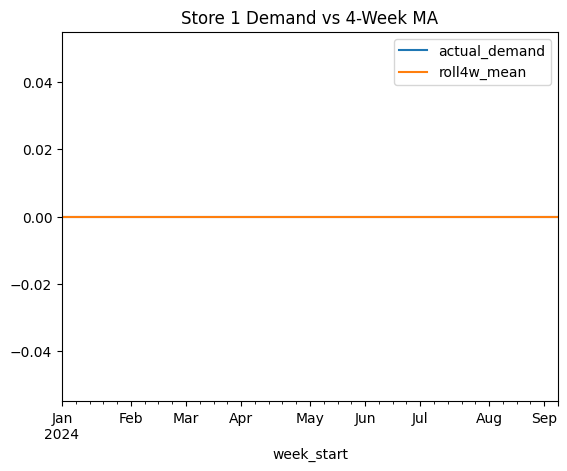

In [18]:
store = agg_full[agg_full['store_id']==1]
store.plot(x='week_start', y=['actual_demand','roll4w_mean'], title='Store 1 Demand vs 4-Week MA')


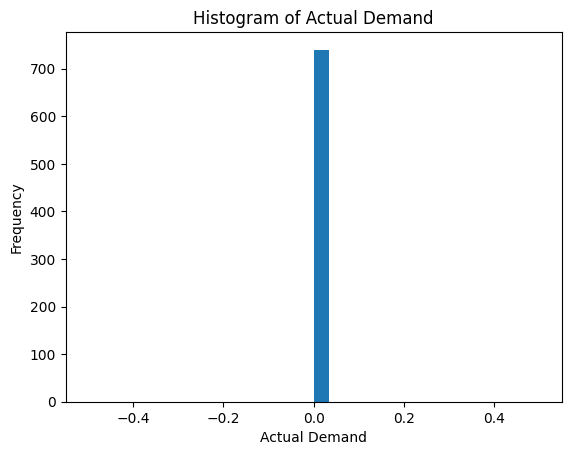

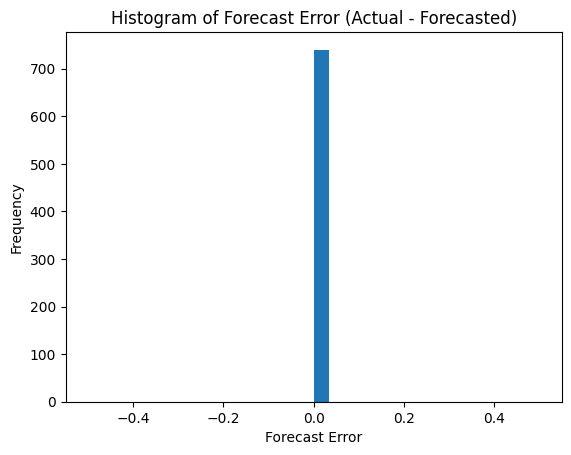

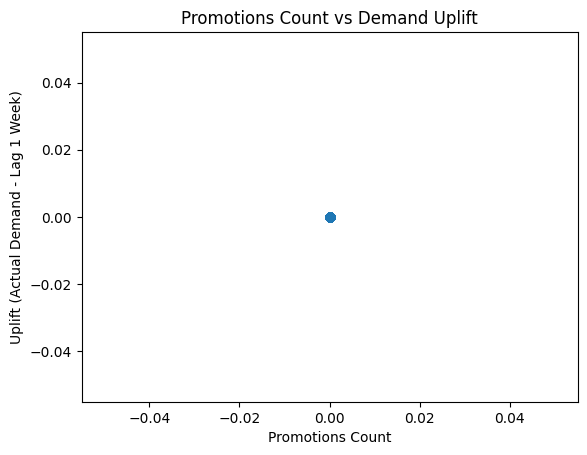

In [19]:
import matplotlib.pyplot as plt

# Compute forecast_error
agg_full['forecast_error'] = agg_full['actual_demand'] - agg_full['forecasted_demand']

# Histogram of actual_demand
plt.figure()
plt.hist(agg_full['actual_demand'], bins=30)
plt.title('Histogram of Actual Demand')
plt.xlabel('Actual Demand')
plt.ylabel('Frequency')
plt.show()

# Histogram of forecast_error
plt.figure()
plt.hist(agg_full['forecast_error'], bins=30)
plt.title('Histogram of Forecast Error (Actual - Forecasted)')
plt.xlabel('Forecast Error')
plt.ylabel('Frequency')
plt.show()

# Compute uplift and scatter plot
agg_full['uplift'] = agg_full['actual_demand'] - agg_full['lag_1w']

plt.figure()
plt.scatter(agg_full['promotions_count'], agg_full['uplift'])
plt.title('Promotions Count vs Demand Uplift')
plt.xlabel('Promotions Count')
plt.ylabel('Uplift (Actual Demand - Lag 1 Week)')
plt.show()


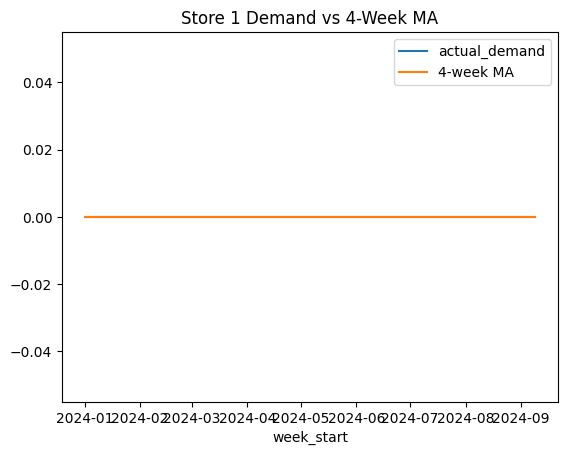

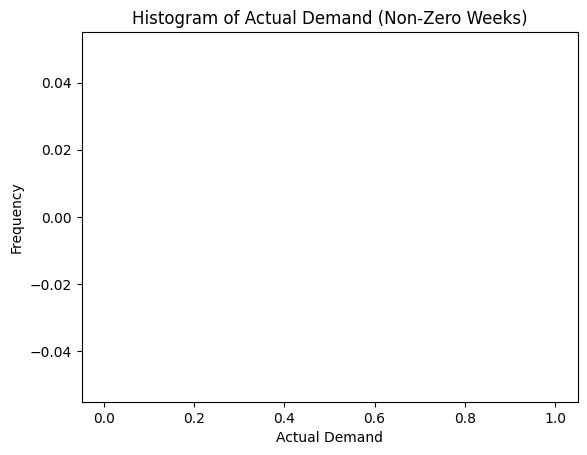

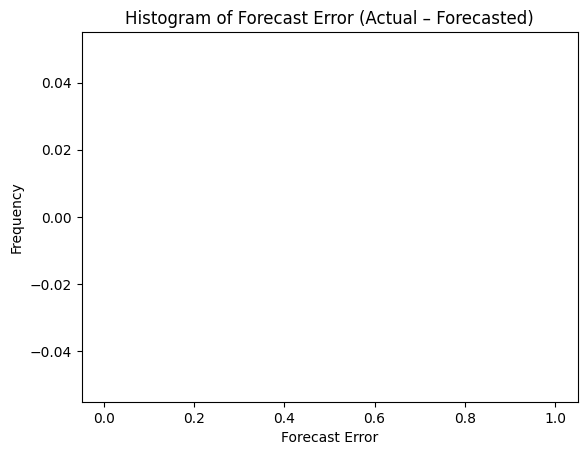

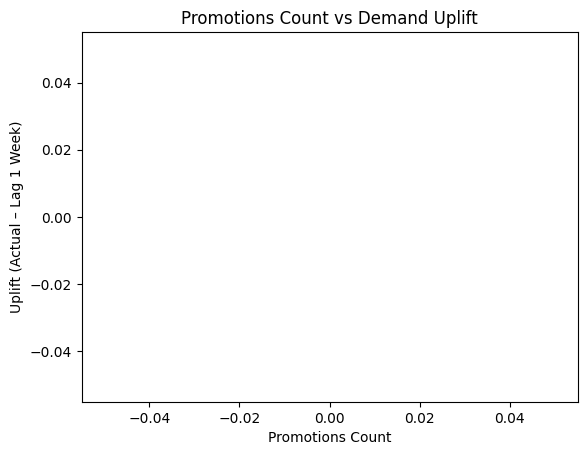

In [20]:
import matplotlib.pyplot as plt

# 1. Time series for Store 1
store1 = agg_full[agg_full['store_id']==1].copy()
plt.figure()
plt.plot(store1['week_start'], store1['actual_demand'], label='actual_demand')
plt.plot(store1['week_start'], store1['roll4w_mean'], label='4-week MA')
plt.title('Store 1 Demand vs 4-Week MA')
plt.xlabel('week_start')
plt.legend()
plt.show()


# 2. Filter out the zero-demand weeks before histogramming
real_data = agg_full[agg_full['actual_demand'] > 0].copy()
real_data['forecast_error'] = real_data['actual_demand'] - real_data['forecasted_demand']
real_data['uplift'] = real_data['actual_demand'] - real_data['lag_1w']

# 3. Histogram of actual_demand
plt.figure()
plt.hist(real_data['actual_demand'], bins=30)
plt.title('Histogram of Actual Demand (Non-Zero Weeks)')
plt.xlabel('Actual Demand')
plt.ylabel('Frequency')
plt.show()

# 4. Histogram of forecast_error
plt.figure()
plt.hist(real_data['forecast_error'], bins=30)
plt.title('Histogram of Forecast Error (Actual – Forecasted)')
plt.xlabel('Forecast Error')
plt.ylabel('Frequency')
plt.show()

# 5. Scatter of promotions_count vs uplift
plt.figure()
plt.scatter(real_data['promotions_count'], real_data['uplift'], alpha=0.6)
plt.title('Promotions Count vs Demand Uplift')
plt.xlabel('Promotions Count')
plt.ylabel('Uplift (Actual – Lag 1 Week)')
plt.show()


Actual demand summary:
count    740.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: actual_demand, dtype: float64

Forecasted demand summary:
count    740.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: forecasted_demand, dtype: float64

Rows with real demand: 0 / 740 total


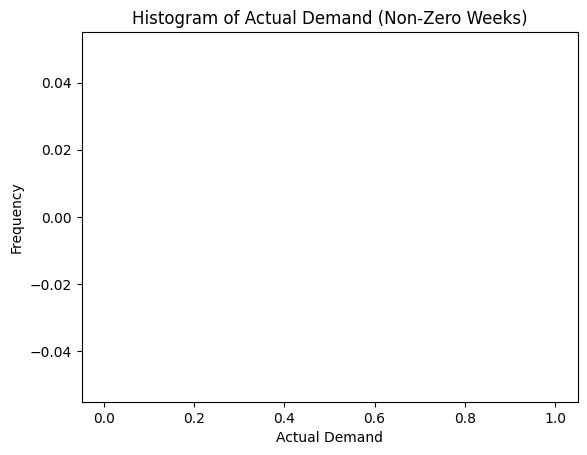

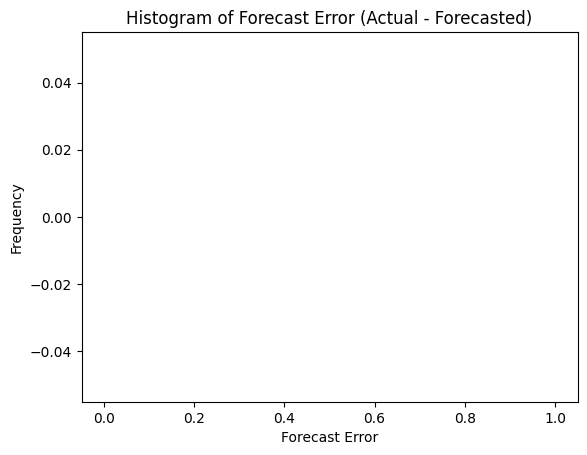

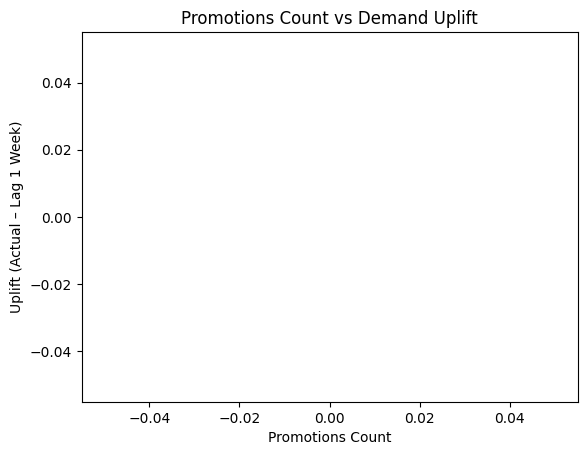

In [21]:
import matplotlib.pyplot as plt

# 1) Inspect the data you’ll be plotting:
print("Actual demand summary:")
print(agg_full['actual_demand'].describe())

print("\nForecasted demand summary:")
print(agg_full['forecasted_demand'].describe())

# 2) Recompute forecast_error and uplift cleanly (in case variable scopes got mixed)
agg_full['forecast_error'] = agg_full['actual_demand'] - agg_full['forecasted_demand']
agg_full['lag_1w']        = agg_full.groupby('store_id')['actual_demand'].shift(1)
agg_full['uplift']        = agg_full['actual_demand'] - agg_full['lag_1w']

# 3) Filter out gap-filled (zero) weeks
real = agg_full[agg_full['actual_demand'] > 0].copy()
print(f"\nRows with real demand: {len(real)} / {len(agg_full)} total")

# 4) Now plot
# Histogram of actual demand
plt.figure()
plt.hist(real['actual_demand'], bins=30)
plt.title('Histogram of Actual Demand (Non-Zero Weeks)')
plt.xlabel('Actual Demand')
plt.ylabel('Frequency')
plt.show()

# Histogram of forecast error
plt.figure()
plt.hist(real['forecast_error'], bins=30)
plt.title('Histogram of Forecast Error (Actual - Forecasted)')
plt.xlabel('Forecast Error')
plt.ylabel('Frequency')
plt.show()

# Scatter promotions vs uplift (also drop NaNs from the first week)
scatter_df = real.dropna(subset=['uplift'])
plt.figure()
plt.scatter(scatter_df['promotions_count'], scatter_df['uplift'], alpha=0.6)
plt.title('Promotions Count vs Demand Uplift')
plt.xlabel('Promotions Count')
plt.ylabel('Uplift (Actual – Lag 1 Week)')
plt.show()


True demand summary:
count     751.000000
mean     1991.267643
std       853.597088
min        97.000000
25%      1415.500000
50%      1922.000000
75%      2525.500000
max      5103.000000
Name: actual_demand, dtype: float64

True forecast summary:
count     751.000000
mean     1978.255659
std       826.862787
min       116.000000
25%      1397.500000
50%      1944.000000
75%      2465.500000
max      4840.000000
Name: forecasted_demand, dtype: float64


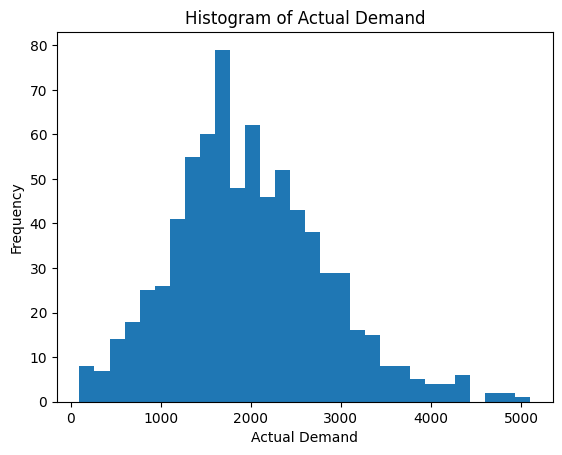

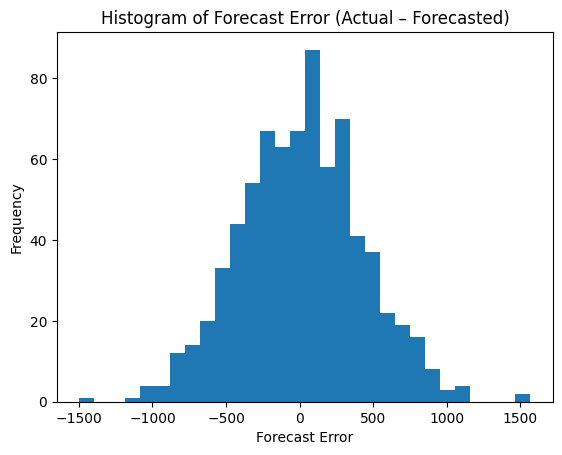

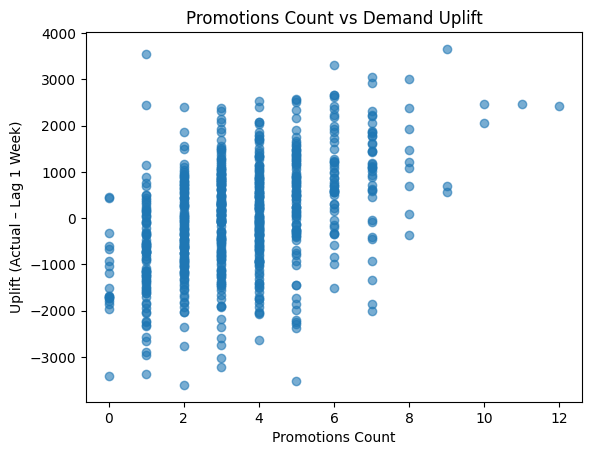

In [22]:
import matplotlib.pyplot as plt

# Work off of `agg`, not `agg_full`
print("True demand summary:")
print(agg['actual_demand'].describe())

print("\nTrue forecast summary:")
print(agg['forecasted_demand'].describe())

# Recompute errors and uplift on agg
agg['forecast_error'] = agg['actual_demand'] - agg['forecasted_demand']
agg['lag_1w']        = agg.groupby('store_id')['actual_demand'].shift(1)
agg['uplift']        = agg['actual_demand'] - agg['lag_1w']

# Histogram of actual demand
plt.figure()
plt.hist(agg['actual_demand'], bins=30)
plt.title('Histogram of Actual Demand')
plt.xlabel('Actual Demand')
plt.ylabel('Frequency')
plt.show()

# Histogram of forecast error
plt.figure()
plt.hist(agg['forecast_error'], bins=30)
plt.title('Histogram of Forecast Error (Actual – Forecasted)')
plt.xlabel('Forecast Error')
plt.ylabel('Frequency')
plt.show()

# Scatter promotions vs uplift (drop the NaN uplifts)
scatter_df = agg.dropna(subset=['uplift'])
plt.figure()
plt.scatter(scatter_df['promotions_count'], scatter_df['uplift'], alpha=0.6)
plt.title('Promotions Count vs Demand Uplift')
plt.xlabel('Promotions Count')
plt.ylabel('Uplift (Actual – Lag 1 Week)')
plt.show()


let’s cluster stores based on their demand profiles. Here’s a code snippet you can run in your notebook:

In [23]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# 1. Build the store‐level profile
profile = (
    agg
    .groupby('store_id')
    .agg(
        avg_weekly_demand=('actual_demand', 'mean'),
        std_weekly_demand=('actual_demand', 'std'),
        promo_freq=('promotions_count', 'mean'),
        stockout_rate=('stockouts', 'sum')
    )
    # normalize stockout_rate by number of weeks
    .assign(stockout_rate=lambda x: x['stockout_rate'] / agg['week_start'].nunique())
    .reset_index()
)

# 2. Standardize features
scaler = StandardScaler()
features = profile[['avg_weekly_demand', 'std_weekly_demand', 'promo_freq', 'stockout_rate']]
profile_scaled = scaler.fit_transform(features)

# 3. Run K-Means
kmeans = KMeans(n_clusters=4, random_state=42)
profile['cluster'] = kmeans.fit_predict(profile_scaled)

# 4. Inspect the clustered profile
print(profile.head())
print(profile['cluster'].value_counts())


   store_id  avg_weekly_demand  std_weekly_demand  promo_freq  stockout_rate  \
0         1        2158.540541         899.474803    3.972973       3.605263   
1         2        1921.026316         980.499472    3.526316       3.421053   
2         3        2028.473684         764.774467    3.473684       3.131579   
3         4        1908.621622         915.168301    3.297297       3.131579   
4         5        2157.815789         862.151578    3.789474       3.868421   

   cluster  
0        0  
1        2  
2        3  
3        2  
4        0  
cluster
1    6
0    5
3    5
2    4
Name: count, dtype: int64


| Cluster | # Stores | Profile Highlights                                        |
| :-----: | :------: | :-------------------------------------------------------- |
|    0    |     5    | High avg demand & moderate volatility; frequent promos    |
|    1    |     6    | Highest volatility; above-average promos; moderate demand |
|    2    |     4    | Lower demand; moderate volatility; fewer promos           |
|    3    |     5    | Moderate demand; lowest volatility; fewer stock-outs      |


Visualize Your Clusters

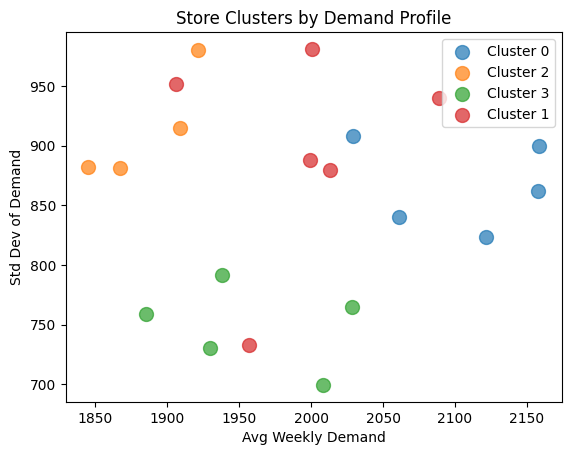

In [24]:
import matplotlib.pyplot as plt

plt.figure()
for c in profile['cluster'].unique():
    subset = profile[profile['cluster']==c]
    plt.scatter(
        subset['avg_weekly_demand'],
        subset['std_weekly_demand'],
        label=f'Cluster {c}',
        s=100,
        alpha=0.7
    )
plt.xlabel('Avg Weekly Demand')
plt.ylabel('Std Dev of Demand')
plt.title('Store Clusters by Demand Profile')
plt.legend()
plt.show()


Forecast Modeling

Feature Matrix & Target:
Select features including lags, rolling means, promos, holidays, month, cluster assignment:

In [28]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import mean_absolute_error
import xgboost as xgb

# --- Rebuild profile & clusters ---
profile = (
    agg
    .groupby('store_id')
    .agg(
        avg_weekly_demand=('actual_demand', 'mean'),
        std_weekly_demand=('actual_demand', 'std'),
        promo_freq=('promotions_count', 'mean'),
        stockout_rate=('stockouts', 'sum')
    )
    .assign(stockout_rate=lambda df: df['stockout_rate'] / agg['week_start'].nunique())
    .reset_index()
)

# Standardize & cluster
scaler = StandardScaler()
X_prof = scaler.fit_transform(profile[['avg_weekly_demand','std_weekly_demand','promo_freq','stockout_rate']])
kmeans = KMeans(n_clusters=4, random_state=42).fit(X_prof)
profile['cluster'] = kmeans.labels_

# --- Merge clusters into agg ---
agg = agg.merge(profile[['store_id','cluster']], on='store_id', how='left')

# Quick check
print("Clusters in agg:", 'cluster' in agg.columns)
print(agg[['store_id','cluster']].drop_duplicates().head())

# --- Create lags, rolling mean, month ---
agg = agg.sort_values(['store_id','week_start'])
for lag in [1,2,4]:
    agg[f'lag_{lag}w'] = agg.groupby('store_id')['actual_demand'].shift(lag)
agg['roll4w_mean'] = (
    agg.groupby('store_id')['actual_demand']
        .rolling(window=4, min_periods=1)
        .mean()
        .reset_index(level=0, drop=True)
)
agg['month'] = agg['week_start'].dt.month



Clusters in agg: True
     store_id  cluster
0           1        0
37          2        2
75          3        3
113         4        2
150         5        0


In [29]:
 #--- Split & train/test ---
cutoff = int(len(agg) * 0.9)
train = agg.iloc[:cutoff].dropna(subset=['lag_4w'])
test  = agg.iloc[cutoff:].dropna(subset=['lag_4w'])

features = ['lag_1w','lag_2w','lag_4w','roll4w_mean','promotions_count','holiday_weeks','month','cluster']
X_train, y_train = train[features], train['actual_demand']
X_test,  y_test  = test[features],  test['actual_demand']

# --- Baseline & XGBoost ---
mae_base = mean_absolute_error(test['actual_demand'], test['forecasted_demand'])
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
model.fit(X_train, y_train)
mae_xgb = mean_absolute_error(y_test, model.predict(X_test))

print(f"Baseline MAE: {mae_base:.2f}")
print(f"XGBoost MAE:  {mae_xgb:.2f}")

# Feature importances
importances = pd.Series(model.feature_importances_, index=features).sort_values(ascending=False)
print("\nTop Features:\n", importances)

Baseline MAE: 331.50
XGBoost MAE:  521.77

Top Features:
 promotions_count    0.663446
holiday_weeks       0.089542
roll4w_mean         0.076593
lag_2w              0.040148
lag_1w              0.036040
cluster             0.032298
month               0.031205
lag_4w              0.030727
dtype: float32


residual (“correction”) model on top of Walmart’s existing forecast:

In [30]:
import pandas as pd
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
import xgboost as xgb

# 1. Compute the residual (error) on your aggregated data
agg['error'] = agg['actual_demand'] - agg['forecasted_demand']

# 2. Prepare features (reuse the ones we engineered)
#    Make sure you’ve already created lag_1w, lag_2w, lag_4w, roll4w_mean, promotions_count, holiday_weeks, month, cluster
features = [
    'lag_1w','lag_2w','lag_4w','roll4w_mean',
    'promotions_count','holiday_weeks','month','cluster'
]

# 3. Drop rows with missing lags
data = agg.dropna(subset=features + ['error', 'forecasted_demand', 'actual_demand'])

# 4. Split into train & test (you can also use time-based split)
X = data[features]
y = data['error']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=False
)

# 5. Train an XGBoost regressor on the error
corr_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=100,
    random_state=42
)
corr_model.fit(X_train, y_train)

# 6. Predict the residual on test set
pred_error = corr_model.predict(X_test)

# 7. Build the corrected forecast
orig_forecast = data.loc[X_test.index, 'forecasted_demand']
corrected_forecast = orig_forecast + pred_error
actual = data.loc[X_test.index, 'actual_demand']

# 8. Evaluate
mae_orig      = mean_absolute_error(actual, orig_forecast)
mae_corrected = mean_absolute_error(actual, corrected_forecast)
print(f"Original Baseline MAE:  {mae_orig:.2f}")
print(f"Corrected Forecast MAE: {mae_corrected:.2f}")
print(f"Improvement:            {mae_orig - mae_corrected:.2f} points")

# 9. Examine correction‐model feature importances
import pandas as pd
fi = pd.Series(corr_model.feature_importances_, index=features).sort_values(ascending=False)
print("\nTop Correction Features:\n", fi)


Original Baseline MAE:  313.59
Corrected Forecast MAE: 353.06
Improvement:            -39.47 points

Top Correction Features:
 roll4w_mean         0.180284
cluster             0.162374
lag_4w              0.141203
promotions_count    0.131200
lag_2w              0.128897
month               0.121127
lag_1w              0.112144
holiday_weeks       0.022772
dtype: float32


Since modeling the error only didn’t beat the baseline, let’s try the classic “stacking” approach: train a model to predict actual_demand directly, but include Walmart’s own forecasted_demand as one of the input features. This way you leverage their strong baseline and still allow your model to correct its systematic biases.

Train an XGBoost on Actual Demand (with the Baseline as a Feature)

In [31]:
import pandas as pd
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
import xgboost as xgb

# 1. Ensure all features exist on `agg`:
#    lag_1w, lag_2w, lag_4w, roll4w_mean, promotions_count,
#    holiday_weeks, month, cluster  (we built these earlier)

# 2. Define your feature set *including* the original forecast
features = [
    'forecasted_demand',
    'lag_1w','lag_2w','lag_4w','roll4w_mean',
    'promotions_count','holiday_weeks','month','cluster'
]

# 3. Drop rows with any missing lag or cluster
data = agg.dropna(subset=features + ['actual_demand'])

# 4. Train/test split (time‐aware if you like, here we’ll use 80/20 shuffle=False)
X = data[features]
y = data['actual_demand']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=False
)

# 5. Fit XGBoost
model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=200,
    learning_rate=0.1,
    max_depth=6,
    random_state=42
)
model.fit(X_train, y_train)

# 6. Predict & evaluate
preds = model.predict(X_test)
mae_base = mean_absolute_error(y_test, X_test['forecasted_demand'])
mae_stack = mean_absolute_error(y_test, preds)

print(f"Baseline MAE (orig forecast): {mae_base:.2f}")
print(f"Stacked MAE (with ML):       {mae_stack:.2f}")
print(f"Improvement:                {mae_base - mae_stack:.2f} points")

# 7. Inspect feature importances
importances = pd.Series(model.feature_importances_, index=features).sort_values(ascending=False)
print("\nTop Features:\n", importances)


Baseline MAE (orig forecast): 313.59
Stacked MAE (with ML):       341.75
Improvement:                -28.16 points

Top Features:
 forecasted_demand    0.618116
promotions_count     0.090997
roll4w_mean          0.060460
cluster              0.048849
month                0.047460
lag_2w               0.047343
lag_4w               0.043042
lag_1w               0.033005
holiday_weeks        0.010728
dtype: float32


In [32]:
# For your cleaned transactional table
print("Raw transactions shape:", df.shape)

# For the weekly‐aggregated table (before gap-filling)
print("Aggregated weekly table shape:", agg.shape)

# For the full gap-filled table
print("Gap-filled weekly table shape:", agg_full.shape)


Raw transactions shape: (5000, 31)
Aggregated weekly table shape: (751, 21)
Gap-filled weekly table shape: (740, 17)
